# Confronto fra algoritmi di ordinamento: Selection Sort VS Quick Sort
Preliminarmente importo le librerie necessarie allo svolgimento dell'esercizio e imposto delle costanti per l'esecuzione dei test


In [50]:
from timeit import default_timer as timer
from random import randint, shuffle
import matplotlib.pyplot as plt
import copy
import math

MIN = 10
STEP = 50
SIZE = 10000

# Descrizione degli algoritmi
## Selection sort
Selection sort è un algoritmo di ordinamento basato su confronti che ordina sul posto.

### **Funzionamento**
Il suo funzionamento molto semplice è composto da 2 parti:
1. La ricerca dell'elemento con valore massimo
2. Lo scambio del suddetto elemento con l'ultimo elemento dell'array non ordinato


Divide così l'array in 2 partizioni: una ordinata e una non ordinata.

### **Complessità**
Selection sort ha una complessità computazionale di $O(n^2)$ data dalla ricerca del massimo nel sottoarray non ordinato eseguita $n$ volte (ciclo esterno, indice i)


In [51]:
def selectionSort(array):
  n = len(array)
  for i in range(n-1):
    # Ricerca del massimo
    max = 0 # indice del valore massimo
    for j in range(n-i):
      if array[j] > array[max]:
        max = j

    # Scambio
    array[max], array[n-i-1] = array[n-i-1], array[max]

## Quick Sort
Quick sort è un algoritmo di ordinamento basato su confronti che ordina sul posto; si basa sul metodo divide et impera.

### **Funzionamento**
L'algoritmo si esprime bene in modo ricorsivo. \
Per il suo funzionamento è necessaria una funzione, `partition`. Fissato un elemento, il pivot, `partition` confronta gli elementi dell'array con il pivot e partiziona l'array col pivot in posizione centrale, a sinistra gli elementi minori e a destra gli elementi maggiori di esso. Al termine di partition il pivot è nella sua posizione definitiva. \

### **Complessità**
Possiamo suddividere l'analisi in caso migliore, medio e peggiore \
**Caso peggiore** \
**Caso migliore** \
**Caso medio** \
(non mi va di scriverle ora, lo farò domani)



In [52]:
def quickSortAux(array, p,r):
  def _partition(array, p,r):
    x = array[r]
    i = p-1
    for j in range(p,r):
      if array[j]<=x:
        i += 1
        array[i], array[j] = array[j], array[i]
    array[i+1], array[r] = array[r], array[i+1]
    return i+1
  if p<r:
    pivot = _partition(array, p,r)
    quickSortAux(array, p, pivot-1)
    quickSortAux(array, pivot+1, r)

def quickSort(array):
    quickSortAux(array, 0, len(array)-1)

## Confronto fra gli algoritmi
Per il confronto mi servirò di alcune funzioni ausiliarie
- generateData: genera l'array con i dati da ordinare
- test: misura il tempo di esecuzione in secondi, attraverso `timeit.default_timer()`
- generatePlot: genera il grafico con i tempi di esecuzione in funzione della dimensione dell'array da ordinare

In [53]:
def generateData(size = SIZE):
    upperBound = size * 3
    data = []
    for _ in range(size):
      data.append(randint(0,upperBound))
    shuffle(data)
    return data

In [54]:
def test(algorithm, data):
    times = []
    for i in range(MIN, len(data), STEP):
        start = timer()
        # Faccio così almeno genero una volta
        # il dataset e chiamo test su una porzione di esso
        algorithm(copy.deepcopy(data[:i]))
        end = timer()
        times.append(end-start)
    return times

In [55]:
def generatePlot(times, label, color):
    # Li testo sullo stesso dataset, quindi hanno dimensione uguale
    xValue = list(range(MIN, SIZE, STEP))
    fig, ax = plt.subplots()
    ax.set_xlabel('Numero di elementi')
    ax.set_ylabel('Tempo')
    ax.plot(xValue, times, label=label, color=color)
    ax.set_title(label)
    plt.show()

Iniziamo con i test veri e propri

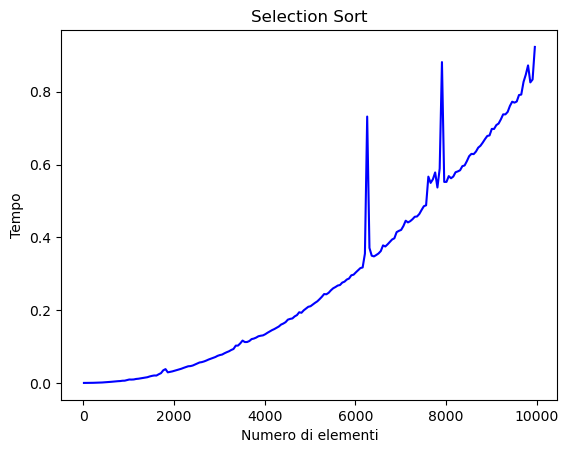

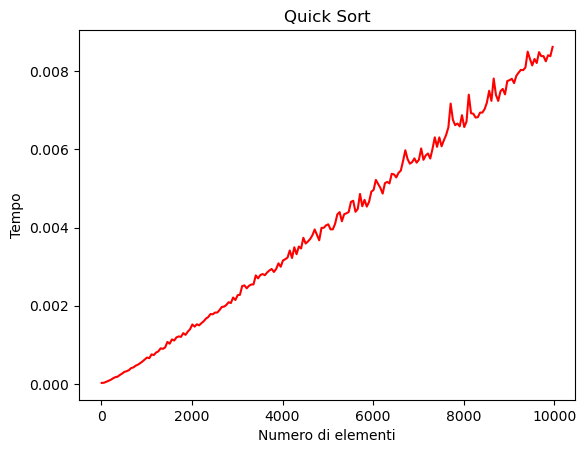

In [56]:
data = generateData()
selectionSortTimes = test(selectionSort, data)
quickSortTimes = test(quickSort, data)
generatePlot(selectionSortTimes, 'Selection Sort', 'blue')
generatePlot(quickSortTimes, 'Quick Sort', 'red')